<a href="https://colab.research.google.com/github/mayankjain281/Data-Cleaning-with-klib-library/blob/main/Data_Cleaning_with_klib_library_ipnb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://towardsdatascience.com/speed-up-your-data-cleaning-and-preprocessing-with-klib-97191d320f80

Data Cleaning With klib is as simple as calling **klib.data_cleaning(df)**, which performs the following operations:

### 1. cleaning the column names:
This unifies the column names by formatting them, splitting, among others, CamelCase into camel_case, removing special characters as well as leading and trailing white-spaces and formatting all column names to lowercase_and_underscore_separated. This also checks for and fixes duplicate column names, which you sometimes get when reading data from a file.

### 2. dropping empty and virtually empty columns:
You can use the parameters drop_threshold_cols and drop_threshold_rows to adjust the dropping to your needs. The default is to drop columns and rows with more than 90% of the values missing.

### 3. removeing single valued columns:
As the name states, this removes columns in which each cell contains the same value. This comes in handy when columns such as “year” are included while you’re just looking at a single year. Other examples are “download_date” or indicator variables which are identical for all entries.

### 4. droping duplicate rows:
This is a straightforward drop of entirely duplicate rows. If you are dealing with data where duplicates add value, consider setting drop_duplicates=False.


### 5. datatype conversion:
Lastly, and often times most importantly, especially for memory reduction and therefore for speeding up the subsequent steps in your workflow, klib.data_cleaning() also optimizes the datatypes as we can see below.


In [21]:
%%capture
!pip install klib

# install new library in Google Colab using !pip install
# you can hide unnecessary outputs in Google Colab by writing %%capture on top of code

In [30]:
import seaborn as sns
df = sns.load_dataset("titanic")

In [31]:
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [15]:
import klib

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [40]:
df_cleaned = klib.data_cleaning(df) # performs datacleaning (drop duplicates & empty rows/cols, adjust dtypes,...)

Shape of cleaned data: (784, 15) - Remaining NAs: 692


Dropped rows: 107
     of which 107 duplicates. (Rows (first 150 shown): [47, 76, 77, 87, 95, 101, 121, 133, 173, 196, 198, 201, 213, 223, 241, 260, 274, 295, 300, 304, 313, 320, 324, 335, 343, 354, 355, 358, 359, 364, 368, 384, 409, 410, 413, 418, 420, 425, 428, 431, 454, 459, 464, 466, 470, 476, 481, 485, 488, 490, 494, 500, 511, 521, 522, 526, 531, 560, 563, 564, 568, 573, 588, 589, 598, 601, 612, 613, 614, 635, 636, 640, 641, 644, 646, 650, 656, 666, 674, 692, 696, 709, 732, 733, 734, 738, 739, 757, 758, 760, 773, 790, 792, 800, 808, 832, 837, 838, 844, 846, 859, 863, 870, 877, 878, 884, 886])

Dropped columns: 0
     of which 0 single valued.     Columns: []
Dropped missing values: 177
Reduced memory by at least: 0.06 MB (-75.0%)



In [44]:
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int8    
 1   pclass       891 non-null    int8    
 2   sex          891 non-null    category
 3   age          714 non-null    float32 
 4   sibsp        891 non-null    int8    
 5   parch        891 non-null    int8    
 6   fare         891 non-null    float32 
 7   embarked     889 non-null    category
 8   class        891 non-null    category
 9   who          891 non-null    category
 10  adult_male   891 non-null    boolean 
 11  deck         203 non-null    category
 12  embark_town  889 non-null    category
 13  alive        891 non-null    category
 14  alone        891 non-null    boolean 
dtypes: boolean(2), category(7), float32(2), int8(4)
memory usage: 21.2 KB


GridSpec(6, 6)

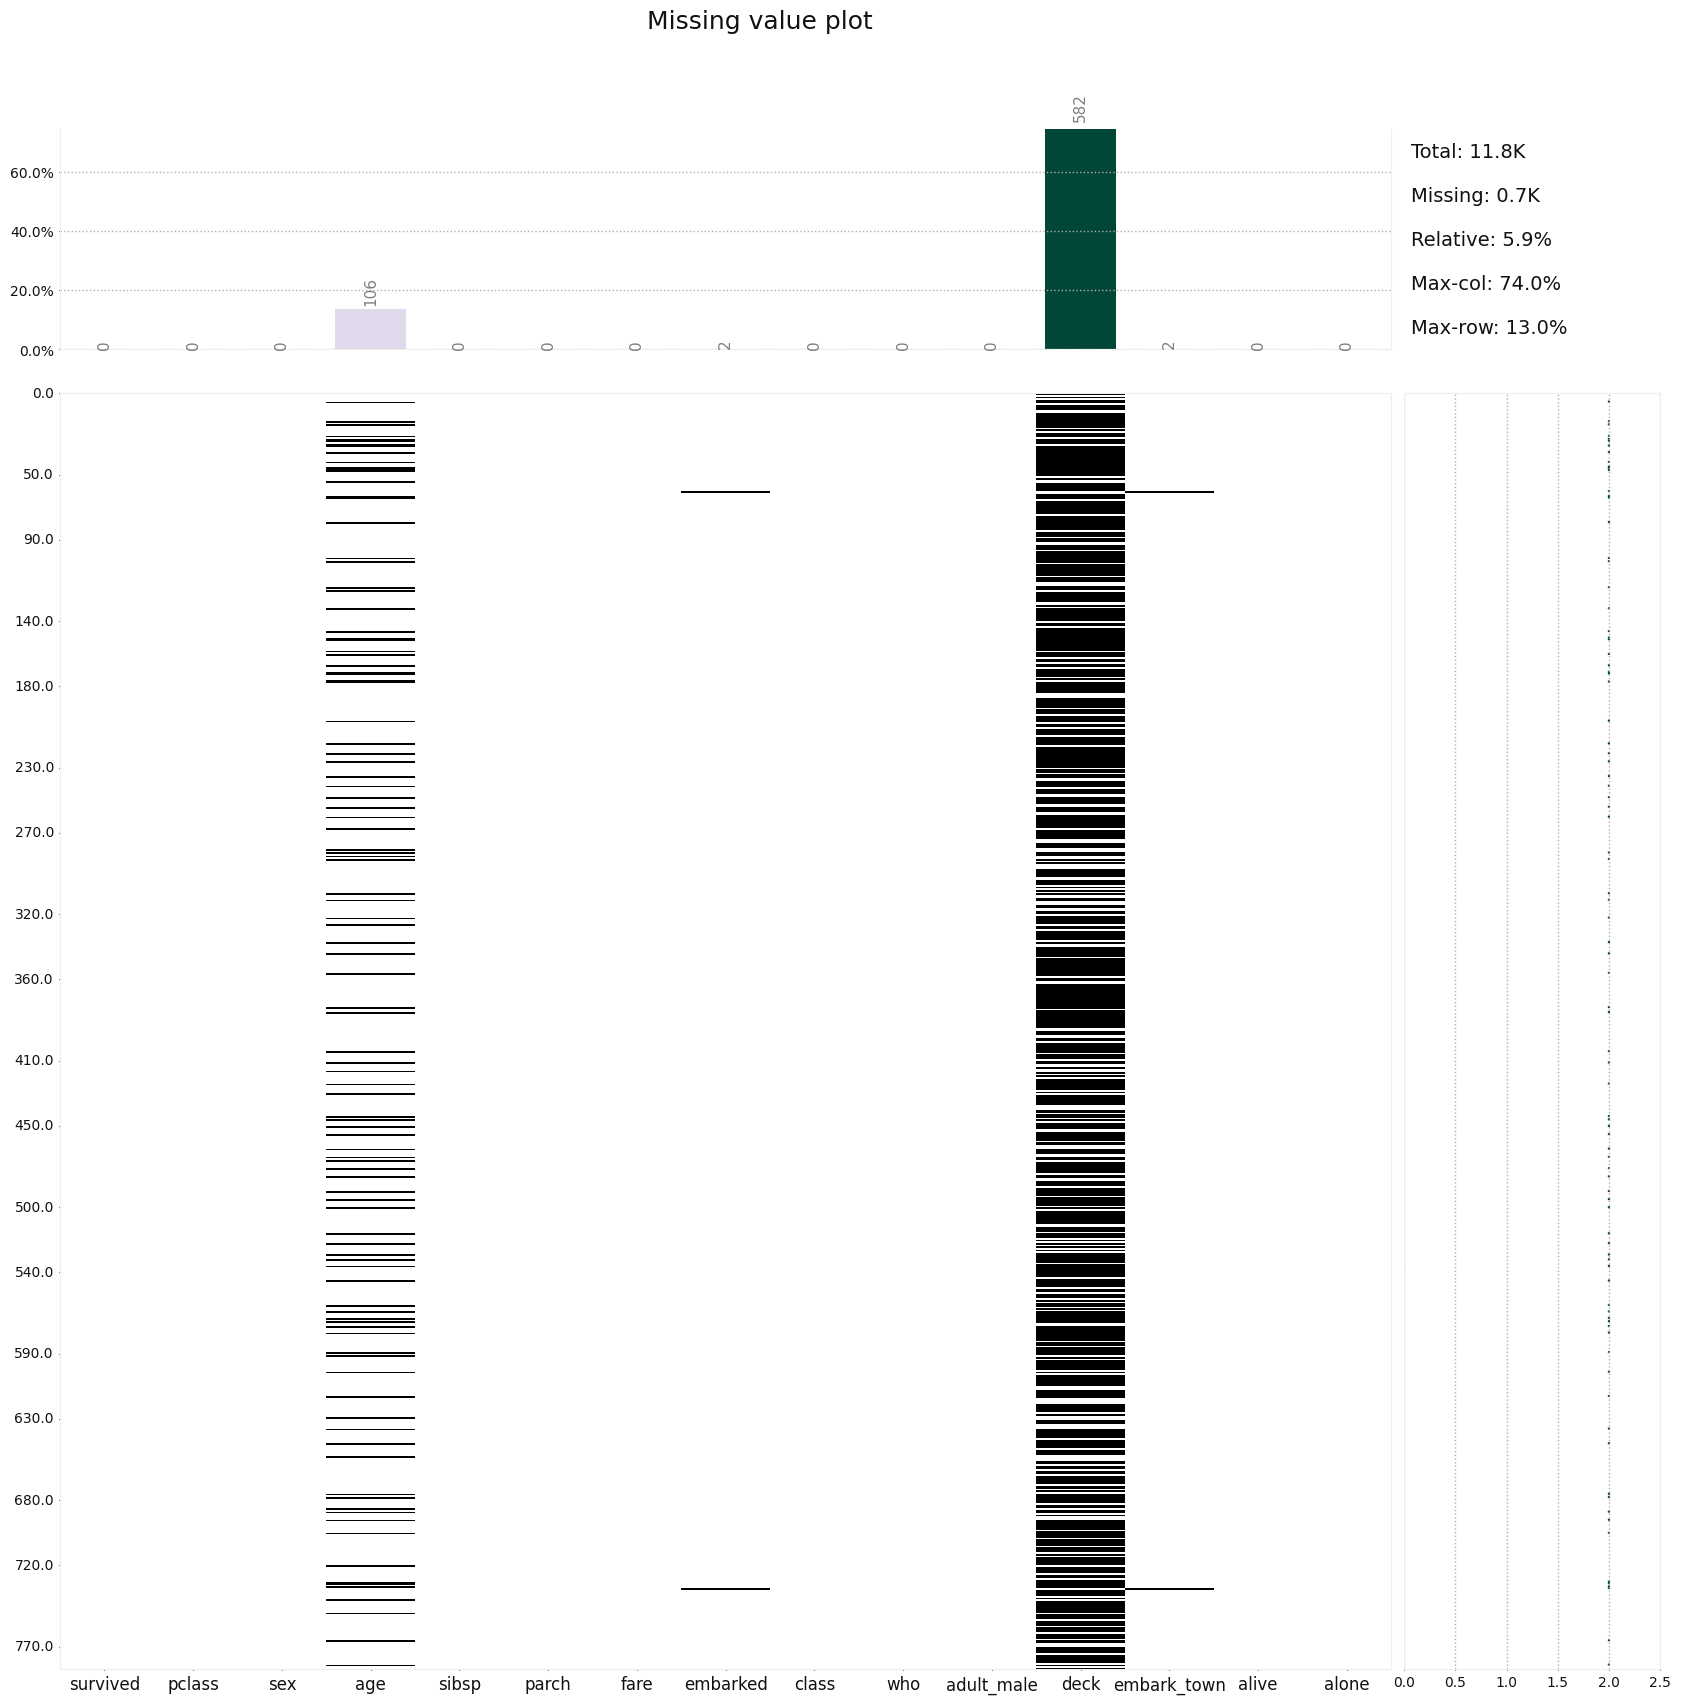

In [48]:
klib.missingval_plot(df_cleaned)

# before removing rows with missing values, first visualize the columns, if any column has more than 90% missing values then remove that column. 
# if column has less than 5% missing values then you can remove those rows, else perform imputation but don't remove rows or columns.

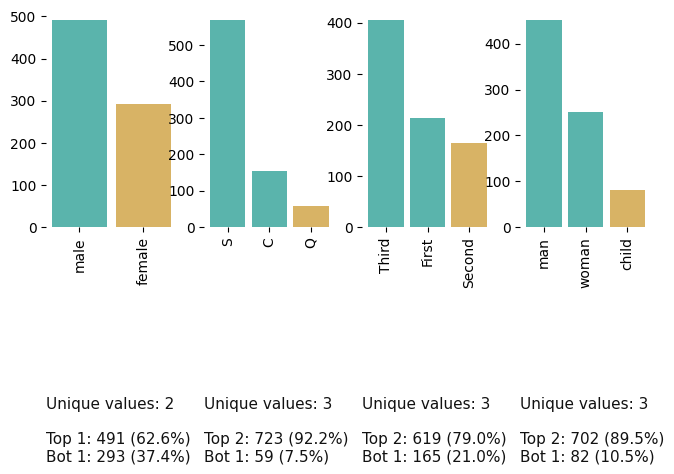

In [49]:
try:
  klib.cat_plot(df_cleaned)
except:
  print()

<Axes: xlabel='fare', ylabel='Density'>

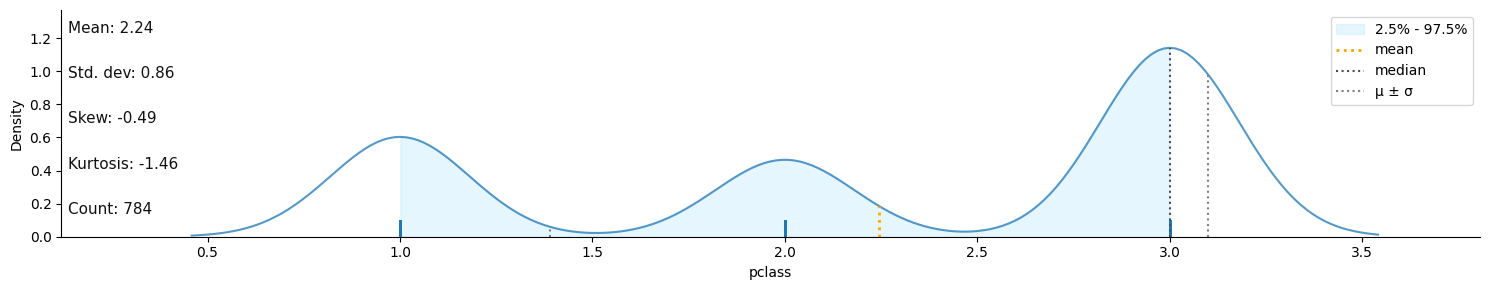

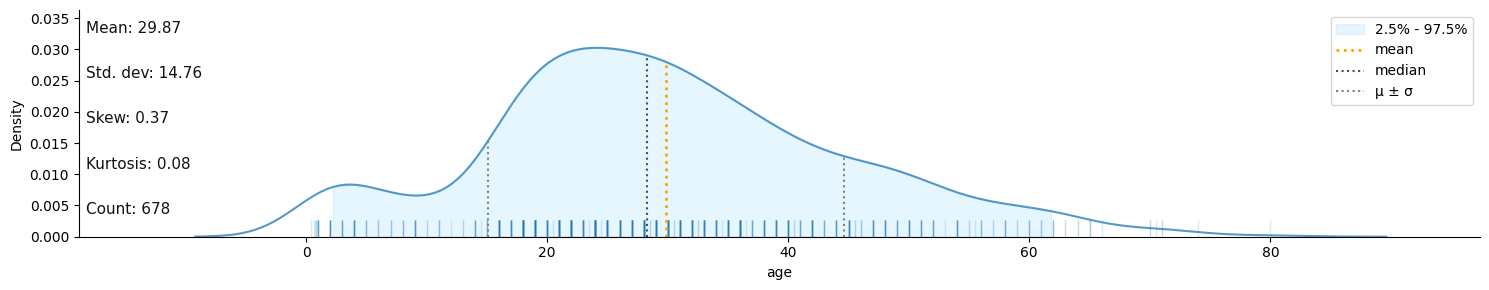

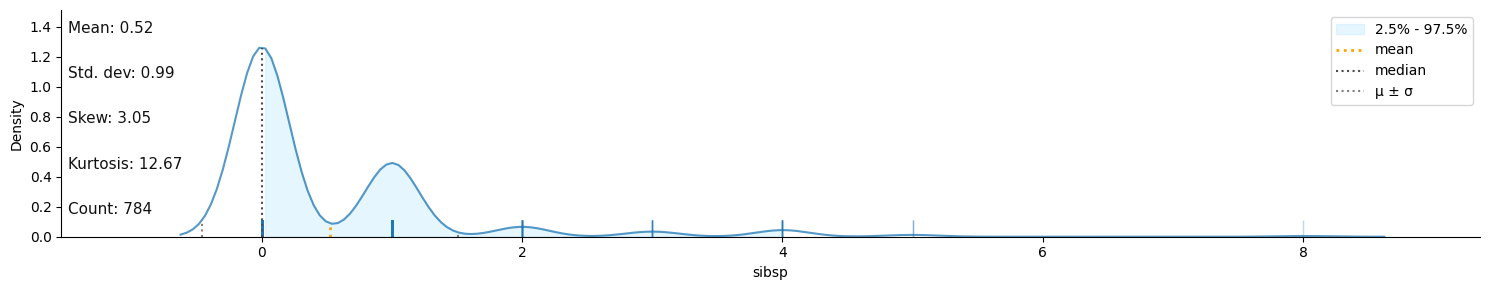

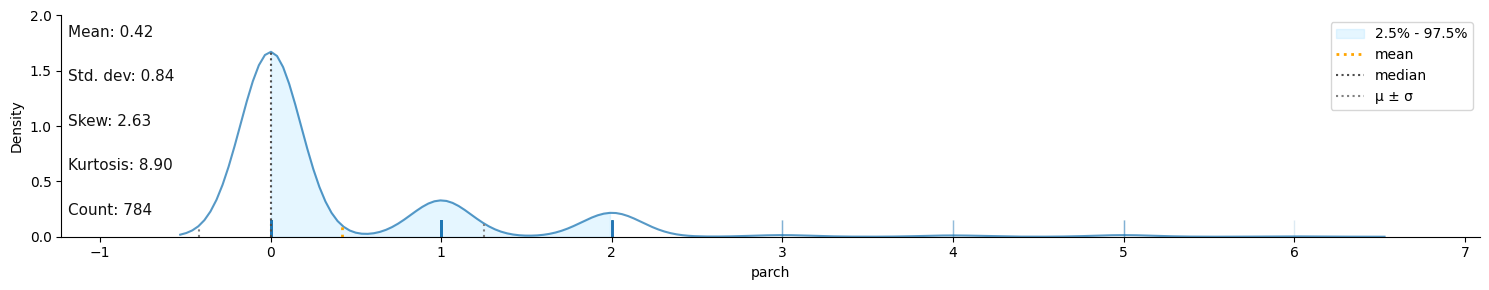

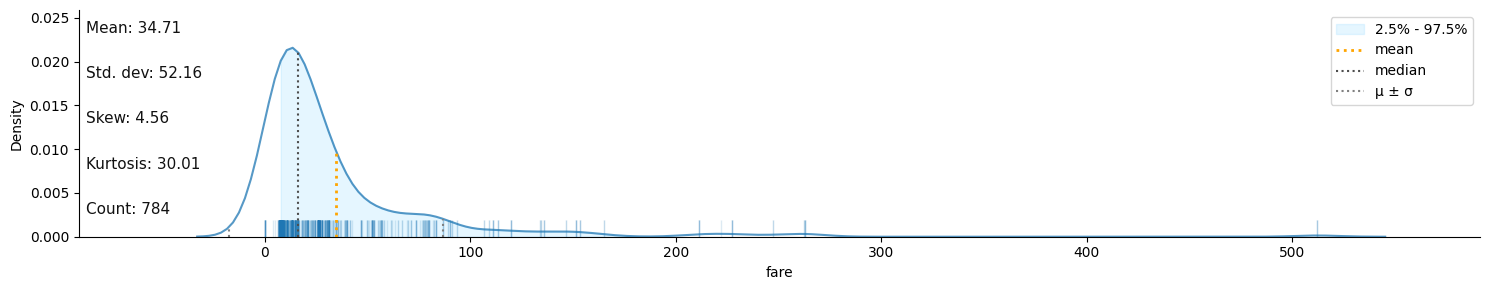

In [46]:
klib.dist_plot(df_cleaned)

### klib.clean - functions for cleaning datasets

klib.data_cleaning(df) # performs datacleaning (drop duplicates & empty rows/cols, adjust dtypes,...)

klib.clean_column_names(df) # cleans and standardizes column names, also called inside data_cleaning()

klib.convert_datatypes(df) # converts existing to more efficient dtypes, also called inside data_cleaning()

klib.drop_missing(df) # drops missing values, also called in data_cleaning()

klib.mv_col_handling(df) # drops features with high ratio of missing vals based on informational content

klib.pool_duplicate_subsets(df) # pools subset of cols based on duplicates with min. loss of information

### klib.describe - functions for visualizing datasets

klib.cat_plot(df) # returns a visualization of the number and frequency of categorical features

klib.corr_mat(df) # returns a color-encoded correlation matrix

klib.corr_plot(df) # returns a color-encoded heatmap, ideal for correlations

klib.dist_plot(df) # returns a distribution plot for every numeric feature

klib.missingval_plot(df) # returns a figure containing information about missing values


https://klib.readthedocs.io/en/latest/_modules/index.html

You can make your own library, library is collection of functions